# Machine Learning using Linear Regression on the Boston Housing Dataset

The Boston Housing Dataset consists of prices of houses in various places in Boston. Along with the price, the dataset also provides information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), etc. 

The dataset can be imported directly from sckit-learn.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

From above, we can see that 'Boston' is a dictionary so we can check out its keys:

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
#information on the data
print(boston.data.shape)

(506, 13)


There are 13 columns in the dataset and we can see what they are from the feature names:

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#Description of Boston
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

But the dataset is not in a format that I can use. So I have to reshape it:

In [11]:
#reshaping into a data frame (method 1) 
boston_df = pd.DataFrame(boston.data)

In [13]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The columns are not what we want though so we have to add the 'feature_names' on:

In [14]:
boston_df.columns = boston.feature_names

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see form above that the 'target' info is not in the dataset. Since that is the price information, I will add a new column into 'boston_df'.

In [16]:
boston_df['Price'] = boston.target

In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Train Test Split

In [18]:
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [19]:
y = boston_df['Price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [26]:
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Predictions from the Model 

In [29]:
predictions = lm.predict(X_test)

In [30]:
predictions

array([38.76995104, 27.39271318, 16.26805601, 16.64592872, 30.5945708 ,
       31.37975753, 37.68282481,  7.57986744, 33.62371472,  6.94206736,
       30.00015138, 13.74184077, 16.41357803, 17.5975484 , 24.92452314,
       20.61277162,  6.84027833, 32.74459645, 28.14176473, 24.87051184,
       12.01460369, 19.89597528, 22.93223855, 24.84808083, 33.41944923,
       18.2663553 , 32.40616206, 19.07263109, 27.85446156, 33.36724349,
       20.31071184, 18.71427039, 36.3942392 , 43.97914411, 28.53636198,
       22.23810379, 15.23341286, 18.4441601 ,  2.99896469, 30.75373687,
       23.98495287, 17.65233987, 33.49269972, 13.72450288, 17.45026475,
       25.3864821 , 29.9370352 , 16.43822597, 27.0157306 , 23.23886475,
       31.8958797 , 36.8917952 , 22.96758436, 18.06656811, 30.34602124,
       -0.30828515, 19.8446382 , 16.6131071 , 23.63902347, 21.26225918,
       29.69766593,  3.14282554, 16.86387632, 19.76329036,  9.71050797,
       24.21870511, 24.27695942, 19.87071765, 17.16247142, 19.85

In [32]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
304    36.1
225    50.0
32     13.2
157    41.3
404     8.5
65     23.5
138    13.3
18     20.2
352    18.6
114    18.5
407    27.9
417    10.4
290    28.5
95     28.4
321    23.1
439    12.8
12     21.7
505    11.9
252    29.6
291    37.3
361    19.9
234    29.0
128    18.0
372    50.0
198    34.6
       ... 
16     23.1
412    17.9
430    14.5
41     26.6
431    14.1
295    28.6
325    24.6
216    23.3
335    21.1
502    20.6
267    50.0
169    22.3
268    43.5
218    21.5
454    14.9
45     19.3
153    19.4
70     24.2
277    33.1
148    17.8
112    18.8
409    27.5
90     22.6
375    15.0
469    20.1
78     21.2
160    27.0
124    18.8
167    23.8
272    24.4
Name: Price, Length: 203, dtype: float64

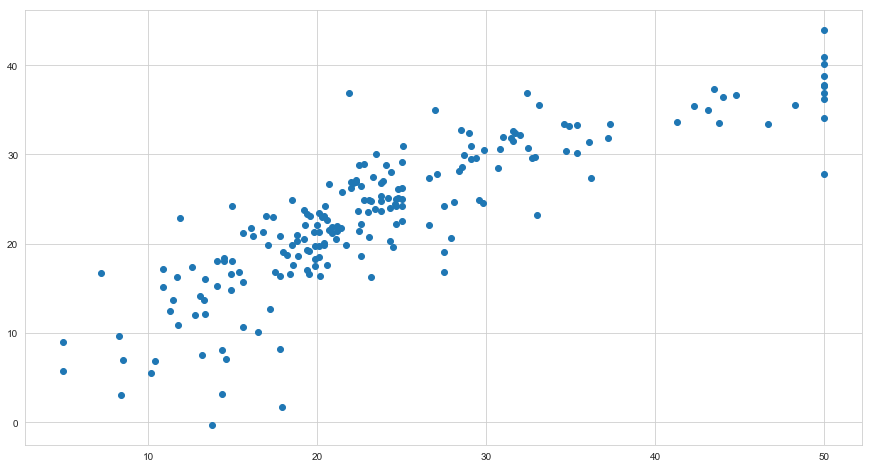

In [39]:
#Compare y_test with predictions
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.scatter(y_test, predictions)

The plot above shows us that the values somewhat up in a linear fashion but not exactly a straight line. Our predictions, therefore, might be a big off from the actual Price.

## Evaluation Metrics

To check the level of error of a model, we can Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These are one of the procedures used to measure the average/square root of the squares of error. Basically, it will check the difference between actual value and the predicted value.

In [41]:
from sklearn import metrics

In [42]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 29.416365467452867
RMSE: 5.423685598138305


The error above shows that the model is fairly good as it is a low output.